In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np
import tensorflow as tf
import deepchem as dc
from deepchem.models.tensorgraph.models.graph_models import GraphConvModel

D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\framework\dtypes.py:529: 

In [2]:
dataset_file = 'BreastCancerInteraction.csv'
task = ['pChEMBL Value']
featurizer_func = dc.feat.ConvMolFeaturizer()

loader = dc.data.CSVLoader(tasks=task, smiles_field='Smiles', featurizer=featurizer_func)
dataset = loader.featurize(dataset_file)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from BreastCancerInteraction.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 16.748 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 1 took 16.651 s
Loading shard 3 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 2 took 0.890 s
TIMING: dataset construction took 41.672 s
Loading dataset from disk.


In [3]:
splitter = dc.splits.splitters.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split( dataset )

TIMING: dataset construction took 11.725 s
Loading dataset from disk.
TIMING: dataset construction took 5.589 s
Loading dataset from disk.
TIMING: dataset construction took 5.602 s
Loading dataset from disk.


In [4]:
len(train_dataset)

13480

In [5]:
len(valid_dataset)

1685

In [6]:
len(test_dataset)

1685

In [7]:
for x,y,w,smiles in test_dataset.itersamples():
    print(y)
    break

[7.52]


----
Model v1

In [16]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)

In [18]:
# Do setup required for tf/keras models
# Number of features on conv-mols
n_feat = 75
# Batch size of models
batch_size = 64
model = GraphConvModel(
    1, batch_size=batch_size, mode='regression')

# Fit trained model
model.fit(train_dataset, nb_epoch=100)

161.03053327225754

In [19]:
print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric])
valid_scores = model.evaluate(valid_dataset, [metric])

print("Train scores")
print(train_scores)

print("Validation scores")
print(valid_scores)

Evaluating model
computed_metrics: [0.7979245585252843]
computed_metrics: [0.6619205798498607]
Train scores
{'mean-pearson_r2_score': 0.7979245585252843}
Validation scores
{'mean-pearson_r2_score': 0.6619205798498607}


---

---

----

In [9]:
mean_pearson_r2 = dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)
rms = dc.metrics.Metric(dc.metrics.rms_score)
mae_score = dc.metrics.Metric(dc.metrics.mae_score)

In [10]:
r_squared_train_scores = []
r_squared_validation_scores = []

rms_train_scores = []
rms_validation_scores = []

mae_train_scores = []
mae_validation_scores = []

for i in range(4,10):
    n_feat = 75
    # Batch size of models
    batch_size = 2**i
    model = GraphConvModel(
    1, batch_size=batch_size, mode='regression')

    # Fit trained model
    model.fit(train_dataset, nb_epoch = 20)
    train_scores = model.evaluate(train_dataset, [mean_pearson_r2,rms,mae_score])
    valid_scores = model.evaluate(valid_dataset, [mean_pearson_r2,rms,mae_score])
    
    print(batch_size,train_scores,valid_scores)
    #Append To arrays
    r_squared_train_scores.append(train_scores.get("mean-pearson_r2_score"))
    r_squared_validation_scores.append(valid_scores.get("mean-pearson_r2_score"))
    
    rms_train_scores.append(train_scores.get("rms_score"))
    rms_validation_scores.append(valid_scores.get("rms_score"))
    
    mae_train_scores.append(train_scores.get("mae_score"))
    mae_validation_scores.append(valid_scores.get("mae_score"))

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


computed_metrics: [0.7336332561439536]
computed_metrics: [0.6115481558870729]
computed_metrics: [0.4621811338859941]
computed_metrics: [0.5909477359861101]
computed_metrics: [0.7600228060906277]
computed_metrics: [0.5611828722493515]
16 {'mean-pearson_r2_score': 0.7336332561439536, 'rms_score': 0.6115481558870729, 'mae_score': 0.4621811338859941} {'mean-pearson_r2_score': 0.5909477359861101, 'rms_score': 0.7600228060906277, 'mae_score': 0.5611828722493515}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7341761474198387]
computed_metrics: [0.6359171638480258]
computed_metrics: [0.4910917646562831]
computed_metrics: [0.6116095664964718]
computed_metrics: [0.762952250100537]
computed_metrics: [0.5834743872345021]
32 {'mean-pearson_r2_score': 0.7341761474198387, 'rms_score': 0.6359171638480258, 'mae_score': 0.4910917646562831} {'mean-pearson_r2_score': 0.6116095664964718, 'rms_score': 0.762952250100537, 'mae_score': 0.5834743872345021}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7145914791500313]
computed_metrics: [0.6282099693851281]
computed_metrics: [0.46768381725617014]
computed_metrics: [0.5900127001856899]
computed_metrics: [0.753457871387942]
computed_metrics: [0.5562551207508144]
64 {'mean-pearson_r2_score': 0.7145914791500313, 'rms_score': 0.6282099693851281, 'mae_score': 0.46768381725617014} {'mean-pearson_r2_score': 0.5900127001856899, 'rms_score': 0.753457871387942, 'mae_score': 0.5562551207508144}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.6532435411520785]
computed_metrics: [0.6978178586199407]
computed_metrics: [0.5308692302304703]
computed_metrics: [0.5654983586761151]
computed_metrics: [0.7790005366969989]
computed_metrics: [0.5877304416531887]
128 {'mean-pearson_r2_score': 0.6532435411520785, 'rms_score': 0.6978178586199407, 'mae_score': 0.5308692302304703} {'mean-pearson_r2_score': 0.5654983586761151, 'rms_score': 0.7790005366969989, 'mae_score': 0.5877304416531887}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.5647261581441428]
computed_metrics: [0.7763367022488467]
computed_metrics: [0.5865429648971181]
computed_metrics: [0.496869048932964]
computed_metrics: [0.8347514232770402]
computed_metrics: [0.6227572844607053]
256 {'mean-pearson_r2_score': 0.5647261581441428, 'rms_score': 0.7763367022488467, 'mae_score': 0.5865429648971181} {'mean-pearson_r2_score': 0.496869048932964, 'rms_score': 0.8347514232770402, 'mae_score': 0.6227572844607053}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.43152243212356656]
computed_metrics: [0.8998092912401446]
computed_metrics: [0.6822503543447448]
computed_metrics: [0.4011337777371783]
computed_metrics: [0.9209163586212479]
computed_metrics: [0.6971077144040381]
512 {'mean-pearson_r2_score': 0.43152243212356656, 'rms_score': 0.8998092912401446, 'mae_score': 0.6822503543447448} {'mean-pearson_r2_score': 0.4011337777371783, 'rms_score': 0.9209163586212479, 'mae_score': 0.6971077144040381}


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

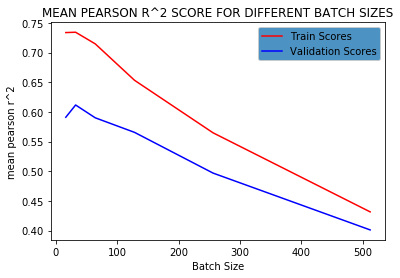

In [13]:
y_train = r_squared_train_scores
y_valid = r_squared_validation_scores
x = [2**i for i in range(4,10)]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('MEAN PEARSON R^2 SCORE FOR DIFFERENT BATCH SIZES')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('Batch Size')
ax.set_ylabel('mean pearson r^2')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

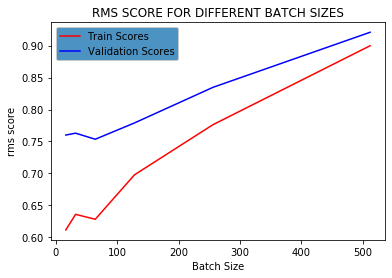

In [14]:
y_train = rms_train_scores
y_valid = rms_validation_scores
x = [2**i for i in range(4,10)]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('RMS SCORE FOR DIFFERENT BATCH SIZES')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('Batch Size')
ax.set_ylabel('rms score')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

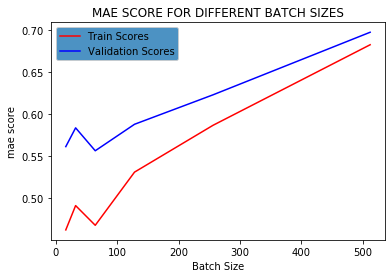

In [15]:
y_train = mae_train_scores
y_valid = mae_validation_scores
x = [2**i for i in range(4,10)]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('MAE SCORE FOR DIFFERENT BATCH SIZES')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('Batch Size')
ax.set_ylabel('mae score')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

In [16]:
r_squared_train_scores = []
r_squared_validation_scores = []

rms_train_scores = []
rms_validation_scores = []

mae_train_scores = []
mae_validation_scores = []

epochs= [1,5,10,20,30,50,100,200]
for i in epochs:
    n_feat = 75
    # Batch size of models
    batch_size = 32
    model = GraphConvModel(
    1, batch_size=batch_size, mode='regression')

    # Fit trained model
    model.fit(train_dataset, nb_epoch = i)
    train_scores = model.evaluate(train_dataset, [mean_pearson_r2,rms,mae_score])
    valid_scores = model.evaluate(valid_dataset, [mean_pearson_r2,rms,mae_score])
    
    print(i,train_scores,valid_scores)
    #Append To arrays
    r_squared_train_scores.append(train_scores.get("mean-pearson_r2_score"))
    r_squared_validation_scores.append(valid_scores.get("mean-pearson_r2_score"))
    
    rms_train_scores.append(train_scores.get("rms_score"))
    rms_validation_scores.append(valid_scores.get("rms_score"))
    
    mae_train_scores.append(train_scores.get("mae_score"))
    mae_validation_scores.append(valid_scores.get("mae_score"))

D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.15613732909309008]
computed_metrics: [1.080875525014625]
computed_metrics: [0.8278355877579325]
computed_metrics: [0.1446766950522991]
computed_metrics: [1.090000739400728]
computed_metrics: [0.8334830357152466]
32 {'mean-pearson_r2_score': 0.15613732909309008, 'rms_score': 1.080875525014625, 'mae_score': 0.8278355877579325} {'mean-pearson_r2_score': 0.1446766950522991, 'rms_score': 1.090000739400728, 'mae_score': 0.8334830357152466}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.4980683487396351]
computed_metrics: [0.8393397888315264]
computed_metrics: [0.6238563932111639]
computed_metrics: [0.45346218093136437]
computed_metrics: [0.873328919785655]
computed_metrics: [0.6483657903703245]
32 {'mean-pearson_r2_score': 0.4980683487396351, 'rms_score': 0.8393397888315264, 'mae_score': 0.6238563932111639} {'mean-pearson_r2_score': 0.45346218093136437, 'rms_score': 0.873328919785655, 'mae_score': 0.6483657903703245}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.5811632334459099]
computed_metrics: [0.8030334009397283]
computed_metrics: [0.5847688113057637]
computed_metrics: [0.5131281665133784]
computed_metrics: [0.8551201804403481]
computed_metrics: [0.6133506935532438]
32 {'mean-pearson_r2_score': 0.5811632334459099, 'rms_score': 0.8030334009397283, 'mae_score': 0.5847688113057637} {'mean-pearson_r2_score': 0.5131281665133784, 'rms_score': 0.8551201804403481, 'mae_score': 0.6133506935532438}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7414041073631157]
computed_metrics: [0.5949331778987934]
computed_metrics: [0.4422407554387227]
computed_metrics: [0.5840275469181968]
computed_metrics: [0.7610658258338906]
computed_metrics: [0.5548532233538865]
32 {'mean-pearson_r2_score': 0.7414041073631157, 'rms_score': 0.5949331778987934, 'mae_score': 0.4422407554387227} {'mean-pearson_r2_score': 0.5840275469181968, 'rms_score': 0.7610658258338906, 'mae_score': 0.5548532233538865}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7907235957421664]
computed_metrics: [0.5367365261597372]
computed_metrics: [0.4057066005254581]
computed_metrics: [0.642868576508426]
computed_metrics: [0.7075261246812157]
computed_metrics: [0.5187984012374406]
32 {'mean-pearson_r2_score': 0.7907235957421664, 'rms_score': 0.5367365261597372, 'mae_score': 0.4057066005254581} {'mean-pearson_r2_score': 0.642868576508426, 'rms_score': 0.7075261246812157, 'mae_score': 0.5187984012374406}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.8567416759880903]
computed_metrics: [0.47589935012307094]
computed_metrics: [0.36752770406005253]
computed_metrics: [0.6525810932393877]
computed_metrics: [0.7223381010398654]
computed_metrics: [0.5348672068263713]
32 {'mean-pearson_r2_score': 0.8567416759880903, 'rms_score': 0.47589935012307094, 'mae_score': 0.36752770406005253} {'mean-pearson_r2_score': 0.6525810932393877, 'rms_score': 0.7223381010398654, 'mae_score': 0.5348672068263713}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.8958800776821406]
computed_metrics: [0.377624700586168]
computed_metrics: [0.28265122551292515]
computed_metrics: [0.6824604696276506]
computed_metrics: [0.6666477962575369]
computed_metrics: [0.48760829685112034]
32 {'mean-pearson_r2_score': 0.8958800776821406, 'rms_score': 0.377624700586168, 'mae_score': 0.28265122551292515} {'mean-pearson_r2_score': 0.6824604696276506, 'rms_score': 0.6666477962575369, 'mae_score': 0.48760829685112034}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.9247084209403232]
computed_metrics: [0.3217452602275445]
computed_metrics: [0.23813063868972634]
computed_metrics: [0.6699881864076944]
computed_metrics: [0.6920369947975051]
computed_metrics: [0.5006720904560908]
32 {'mean-pearson_r2_score': 0.9247084209403232, 'rms_score': 0.3217452602275445, 'mae_score': 0.23813063868972634} {'mean-pearson_r2_score': 0.6699881864076944, 'rms_score': 0.6920369947975051, 'mae_score': 0.5006720904560908}


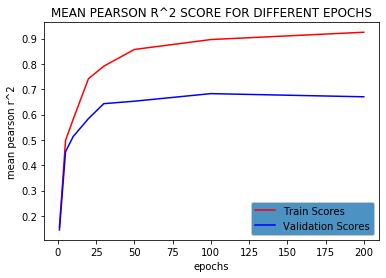

In [17]:
y_train = r_squared_train_scores
y_valid = r_squared_validation_scores
x = epochs

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('MEAN PEARSON R^2 SCORE FOR DIFFERENT EPOCHS')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('epochs')
ax.set_ylabel('mean pearson r^2')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

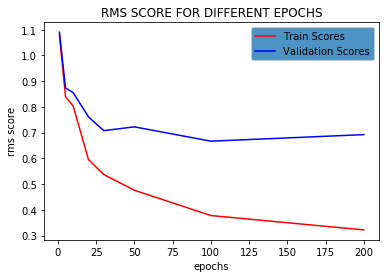

In [20]:
y_train = rms_train_scores
y_valid = rms_validation_scores
x = epochs

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('RMS SCORE FOR DIFFERENT EPOCHS')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('epochs')
ax.set_ylabel('rms score')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

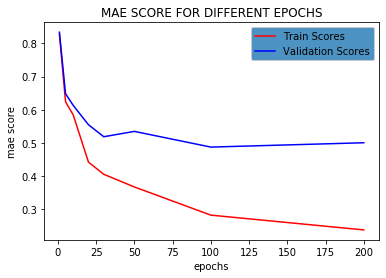

In [21]:
y_train = mae_train_scores
y_valid = mae_validation_scores
x = epochs

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('MAE SCORE FOR DIFFERENT EPOCHS')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('epochs')
ax.set_ylabel('mae score')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

In [10]:
r_squared_train_scores = []
r_squared_validation_scores = []

rms_train_scores = []
rms_validation_scores = []

mae_train_scores = []
mae_validation_scores = []

feat= [10,20,30,40,50,60,70,80,90,100]
for i in feat:
    n_feat = i
    # Batch size of models
    batch_size = 32
    model = GraphConvModel(
    1, batch_size=batch_size, mode='regression')

    # Fit trained model
    model.fit(train_dataset, nb_epoch = 25)
    train_scores = model.evaluate(train_dataset, [mean_pearson_r2,rms,mae_score])
    valid_scores = model.evaluate(valid_dataset, [mean_pearson_r2,rms,mae_score])
    
    print(i,train_scores,valid_scores)
    #Append To arrays
    r_squared_train_scores.append(train_scores.get("mean-pearson_r2_score"))
    r_squared_validation_scores.append(valid_scores.get("mean-pearson_r2_score"))
    
    rms_train_scores.append(train_scores.get("rms_score"))
    rms_validation_scores.append(valid_scores.get("rms_score"))
    
    mae_train_scores.append(train_scores.get("mae_score"))
    mae_validation_scores.append(valid_scores.get("mae_score"))

computed_metrics: [0.777959738820487]
computed_metrics: [0.558412535481222]
computed_metrics: [0.41679296191163523]
computed_metrics: [0.6652171441822016]
computed_metrics: [0.7149804252209974]
computed_metrics: [0.5208996546723296]
10 {'mean-pearson_r2_score': 0.777959738820487, 'rms_score': 0.558412535481222, 'mae_score': 0.41679296191163523} {'mean-pearson_r2_score': 0.6652171441822016, 'rms_score': 0.7149804252209974, 'mae_score': 0.5208996546723296}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7877468712742292]
computed_metrics: [0.5386606715382724]
computed_metrics: [0.4061789430364378]
computed_metrics: [0.6597259695348652]
computed_metrics: [0.7157834031478437]
computed_metrics: [0.5230282280429513]
20 {'mean-pearson_r2_score': 0.7877468712742292, 'rms_score': 0.5386606715382724, 'mae_score': 0.4061789430364378} {'mean-pearson_r2_score': 0.6597259695348652, 'rms_score': 0.7157834031478437, 'mae_score': 0.5230282280429513}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7366108305567034]
computed_metrics: [0.6033975397365964]
computed_metrics: [0.4601268103513255]
computed_metrics: [0.6252112793780846]
computed_metrics: [0.7553312805579996]
computed_metrics: [0.5685034863598366]
30 {'mean-pearson_r2_score': 0.7366108305567034, 'rms_score': 0.6033975397365964, 'mae_score': 0.4601268103513255} {'mean-pearson_r2_score': 0.6252112793780846, 'rms_score': 0.7553312805579996, 'mae_score': 0.5685034863598366}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7676496144826737]
computed_metrics: [0.5649792975960333]
computed_metrics: [0.42908322692537487]
computed_metrics: [0.637741386249703]
computed_metrics: [0.7376626207034891]
computed_metrics: [0.5465969672538856]
40 {'mean-pearson_r2_score': 0.7676496144826737, 'rms_score': 0.5649792975960333, 'mae_score': 0.42908322692537487} {'mean-pearson_r2_score': 0.637741386249703, 'rms_score': 0.7376626207034891, 'mae_score': 0.5465969672538856}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7407166787745024]
computed_metrics: [0.601174305619886]
computed_metrics: [0.45874956489098423]
computed_metrics: [0.61474375357317]
computed_metrics: [0.7646901004446388]
computed_metrics: [0.5689370988838931]
50 {'mean-pearson_r2_score': 0.7407166787745024, 'rms_score': 0.601174305619886, 'mae_score': 0.45874956489098423} {'mean-pearson_r2_score': 0.61474375357317, 'rms_score': 0.7646901004446388, 'mae_score': 0.5689370988838931}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7807865460322878]
computed_metrics: [0.5443176098561393]
computed_metrics: [0.4079157189010526]
computed_metrics: [0.6501692832427428]
computed_metrics: [0.7228192841305016]
computed_metrics: [0.5240575559939619]
60 {'mean-pearson_r2_score': 0.7807865460322878, 'rms_score': 0.5443176098561393, 'mae_score': 0.4079157189010526} {'mean-pearson_r2_score': 0.6501692832427428, 'rms_score': 0.7228192841305016, 'mae_score': 0.5240575559939619}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7785991073028398]
computed_metrics: [0.5445435549219432]
computed_metrics: [0.4099169572370301]
computed_metrics: [0.635591845850196]
computed_metrics: [0.7392235720257955]
computed_metrics: [0.5425591025413484]
70 {'mean-pearson_r2_score': 0.7785991073028398, 'rms_score': 0.5445435549219432, 'mae_score': 0.4099169572370301} {'mean-pearson_r2_score': 0.635591845850196, 'rms_score': 0.7392235720257955, 'mae_score': 0.5425591025413484}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.760520983234017]
computed_metrics: [0.5682858465138372]
computed_metrics: [0.42866530586185775]
computed_metrics: [0.6492643579669201]
computed_metrics: [0.722905748126927]
computed_metrics: [0.5310133759360853]
80 {'mean-pearson_r2_score': 0.760520983234017, 'rms_score': 0.5682858465138372, 'mae_score': 0.42866530586185775} {'mean-pearson_r2_score': 0.6492643579669201, 'rms_score': 0.722905748126927, 'mae_score': 0.5310133759360853}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7483741366430452]
computed_metrics: [0.5822058897609965]
computed_metrics: [0.44121004329739255]
computed_metrics: [0.6401811725503687]
computed_metrics: [0.734884499899773]
computed_metrics: [0.5344322531217144]
90 {'mean-pearson_r2_score': 0.7483741366430452, 'rms_score': 0.5822058897609965, 'mae_score': 0.44121004329739255} {'mean-pearson_r2_score': 0.6401811725503687, 'rms_score': 0.734884499899773, 'mae_score': 0.5344322531217144}


D:\Anaconda\envs\my-rdkit-env\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.7782048726186004]
computed_metrics: [0.5795447726334001]
computed_metrics: [0.4486881109520372]
computed_metrics: [0.6456065327915621]
computed_metrics: [0.7490424401150931]
computed_metrics: [0.5635211273030863]
100 {'mean-pearson_r2_score': 0.7782048726186004, 'rms_score': 0.5795447726334001, 'mae_score': 0.4486881109520372} {'mean-pearson_r2_score': 0.6456065327915621, 'rms_score': 0.7490424401150931, 'mae_score': 0.5635211273030863}


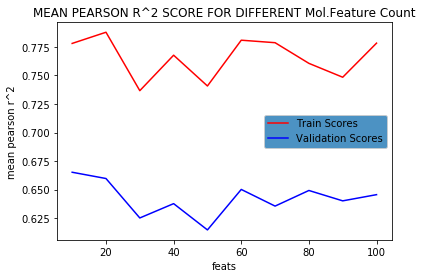

In [13]:
y_train = r_squared_train_scores
y_valid = r_squared_validation_scores
x = feat

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('MEAN PEARSON R^2 SCORE FOR DIFFERENT Mol.Feature Count')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('feats')
ax.set_ylabel('mean pearson r^2')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

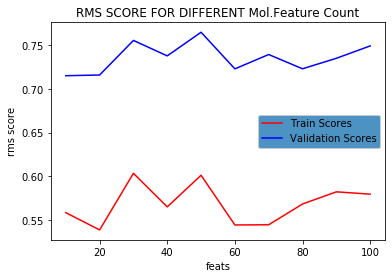

In [14]:
y_train = rms_train_scores
y_valid = rms_validation_scores
x = feat

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('RMS SCORE FOR DIFFERENT Mol.Feature Count')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('feats')
ax.set_ylabel('rms score')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

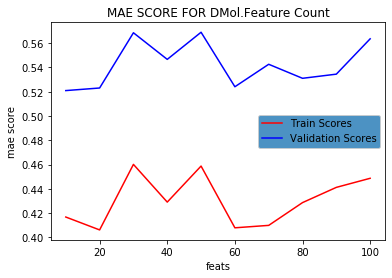

In [15]:
y_train = mae_train_scores
y_valid = mae_validation_scores
x = feat

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.set_title('MAE SCORE FOR DMol.Feature Count')

ax.plot(x, y_train,color ='red', label='Train Scores')
ax.plot(x, y_valid, color = 'blue', label='Validation Scores')

ax.set_xlabel('feats')
ax.set_ylabel('mae score')
legend = ax.legend( shadow=False)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()